In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix



In [34]:
df = pd.read_csv("compas-scores-two-years-violent.csv", index_col=0)

In [35]:
y = y = df['two_year_recid']
keep_cols = [
    'age',             # defendant age
    'sex',             # male/female
    'race',            # categorical
    'priors_count',    # number of prior offenses
    'c_charge_degree'  # felony vs misdemeanor
]

X_safe = df[keep_cols].copy()

# One‐hot encode the categoricals
X= pd.get_dummies(X_safe, drop_first=True)

In [36]:

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109) # 70% training and 30% test

#Create a svm Classifier
clf = svm.SVC(kernel='rbf',class_weight='balanced',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [37]:

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.71
Precision: 0.32
Recall: 0.64


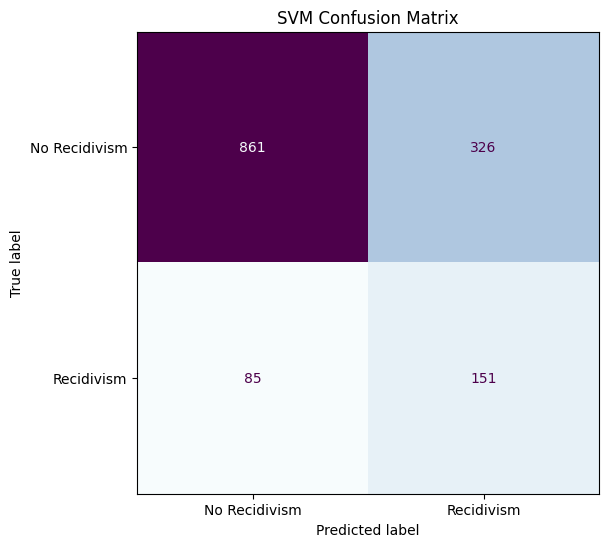

In [41]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['No Recidivism', 'Recidivism']
)

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='BuPu', colorbar=False)
plt.title("SVM Confusion Matrix")
plt.show()

Biasness in Support Vector Machine (SVM) Classifier on COMPASS :

False‐positive rates (FPR)
Black FPR (~37%) is over twice as high as White FPR (~18%). Black non-recidivists are much more likely to be wrongly labeled “high risk.

False‐negative rates (FNR)
The SVM misses 58% of actual White re-offenders vs just 25% of Black ones. So it’s comparatively more sensitive on Black defendants (but at the cost of more false alarms).

In [39]:
def group_stats(g):
    tn, fp, fn, tp = confusion_matrix(
        g['true'], 
        g['pred'],
        labels=[0,1]
    ).ravel()
    return {
        'P(recid_pred=1)': (tp+fp)/len(g),
        'FPR':  fp / (fp + tn) if (fp+tn)>0 else 0,
        'FNR':  fn / (fn + tp) if (fn+tp)>0 else 0,
        'Accuracy': (tp + tn) / len(g)
    }

results = X_test.copy()
results['true'] = y_test
results['pred'] = y_pred

# re-add race and sex from the original df
results['race'] = df.loc[X_test.index, 'race']
results['sex']  = df.loc[X_test.index, 'sex']
# by race
by_race   = results.groupby('race').apply(lambda g: pd.Series(group_stats(g)))
# by gender
by_gender = results.groupby('sex').apply(lambda g: pd.Series(group_stats(g)))

print("Metrics by Race:\n", by_race)
print("\nMetrics by Gender:\n", by_gender)

Metrics by Race:
                   P(recid_pred=1)       FPR       FNR  Accuracy
race                                                           
African-American         0.448584  0.373134  0.251852  0.651267
Asian                    0.333333  0.142857  0.000000  0.888889
Caucasian                0.214801  0.179704  0.580247  0.761733
Hispanic                 0.276423  0.234783  0.125000  0.772358
Native American          0.000000  0.000000  0.000000  1.000000
Other                    0.307692  0.236364  0.300000  0.753846

Metrics by Gender:
         P(recid_pred=1)       FPR       FNR  Accuracy
sex                                                  
Female         0.198052  0.172662  0.566667  0.788961
Male           0.373094  0.305831  0.330097  0.689686


/var/folders/6c/pmclr21d7qxghrnljkq0f9pc0000gn/T/ipykernel_54568/2085525822.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_race   = results.groupby('race').apply(lambda g: pd.Series(group_stats(g)))
/var/folders/6c/pmclr21d7qxghrnljkq0f9pc0000gn/T/ipykernel_54568/2085525822.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_gender = results.groupby('sex').apply(lambda g: pd.Series(group_stats(